# Author: Aakash Dogra
## Project: FIFA 19 Player Analysis

This project revolves around the analysis of huge football( or soccer in United States) data that is presented on official FIFA website. The dataset was taken from Kaggle.com, the link : https://www.kaggle.com/karangadiya/fifa19
The aim of this project is to visualize the data in the best possible way to provide information about the players around the world, the stats of players and different clubs around the world.

Initially we will import all the necessary packages required along the analysis and how these packages will be used to visualize the data will be shown along the code.

Importing pandas, matplotlib, plotly, ipywidgets to create the dashboard for player analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
import ipywidgets
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import re
pd.set_option('display.max_columns', 999)
import warnings
warnings.filterwarnings("ignore")

### Reading the csv file downloaded and saving it in a datarame, df. This dataframe will be utilized to perform the necessary analysis on the data and will be visualized using the same.

In [3]:
df = pd.read_csv("data.csv")
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,8

Here, I tried to insert data into the 'Club' with the condition as where there is no value, we insert "No Club" into the dataset.

In [4]:
df['Club'] = df['Club'].fillna('No Club', inplace = True)

Cleaning the dataset insitially by dropping the unnecessary columns not required for completing the analysis, including the unnamed column.

In [5]:
df.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'Real Face','Loaned From' ,'Release Clause','Joined'],axis=1,inplace=True)

### After dropping the columns, we now check the cleaned dataset with onset of analysis.

In [6]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,None,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,None,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,None,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,None,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,None,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


### Providing the information about the columns of the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 79 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        0 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Contract Valid Until        17918 non-null object
Height                      18159 non-null o

##### Now that we have an idea of the dataset, we now go ahead and work our way through the dataset. After looking at the dataset, the Wage and Value columns are object types, with numerical data. In order to plot these values on our graph, we need to convert the values into float values.

In [8]:
# df['Value'] = df['Value'].str.replace('M','000000')
# df['Value'] = df['Value'].str.replace('€','')
# df['Value']
# df['Wage']= df['Wage'].apply(lambda x: int(re.findall('\d+', x ) + '000'))

df['Wage']  = df['Wage'].apply(lambda x: int(re.findall('\d+', x)[0] + '000'))
df['Value'] = df['Value'].apply(lambda x: 'M' in x and int((re.findall('\d+\.*\d*', x)[0] + '000000').replace('.', '')) or int((re.findall('\d+\.*\d*', x)[0] + '000').replace('.', '')))

In [9]:
df.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,None,1105000000,565000,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,None,77000000,405000,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0


##### Now, we try to see which country has the highest number of football players around the world. We arrange the result in ascending order.

In [10]:
countries = df['Nationality'].value_counts().head(20)
countries

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Name: Nationality, dtype: int64

##### Now, we plot this data using matplotlib package, the plot being used is bar plot. This plot is to show barplot distribution of the countries around the world and the number of players in each country, in ascednding order.

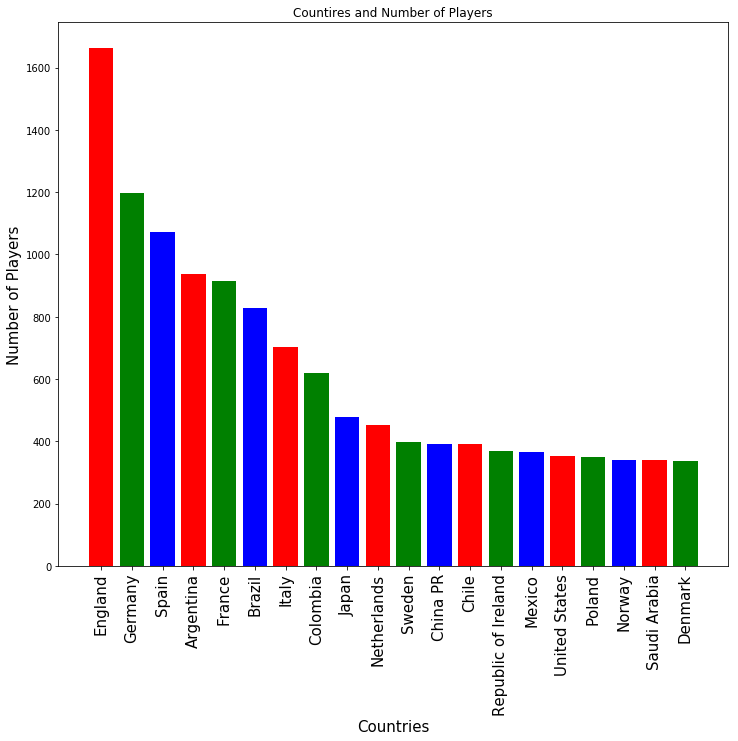

In [11]:
fig, ax = plt.subplots(figsize=(12,10))
x= countries.values
y=countries.index
ax.bar(y,x,align='center',color='rgb')
ax.set_xlabel('Countries',size=15)
ax.set_ylabel("Number of Players",size=15)
plt.xticks(size = 15, rotation=90)
ax.set_title("Countires and Number of Players")
plt.show()

Since, Nationality or country name is being repeated several times in the 'Nationality' column, we create a new dataframe with country names and count of players throughout the dataframe.

In [12]:
df_nations = df.groupby(by='Nationality').size().reset_index()
df_nations.columns = ['Nation', 'Count']
df_nations.head(5)

,Nation,Count
0,Afghanistan,4
1,Albania,40
2,Algeria,60
3,Andorra,1
4,Angola,15


Being a football enthusiast, I know that in order to consider players from England, Scotland, Wales and Northern Ireland, we need to consider all of them in one single country name, United Kingdom. Thus, we try to add all the numebr of players in each country, just to consider them to be part of a league.

In [13]:
df_nations[(df_nations['Nation'] == 'England') | (df_nations['Nation'] == 'Wales') 
           | (df_nations['Nation'] == 'Scotland') | (df_nations['Nation'] == 'Northern Ireland') ]

,Nation,Count
46,England,1662
114,Northern Ireland,80
131,Scotland,286
161,Wales,129


In [14]:
b = df_nations[(df_nations['Nation'] == 'England') + (df_nations['Nation'] == 'Wales') + (df_nations['Nation'] == 'Scotland') + (df_nations['Nation'] == 'Northern Ireland') ]

In [15]:
b['Count'].sum()

2157

In [16]:
df_temp_UK = pd.DataFrame(data= [['United Kingdom', 2157]], columns=['Nation', 'Count'])
df_nations = df_nations.append(df_temp_UK, ignore_index=True)

Now, we can see United Kingdom having the count of all the above mentioned countries.

In [17]:
df_nations.tail()

,Nation,Count
160,Venezuela,67
161,Wales,129
162,Zambia,9
163,Zimbabwe,13
164,United Kingdom,2157


We now have world data, with unique values of countries and unique values with Count. The following visualization is a world map showing the number of players around the world. We use Choropleth in order to visualize the world data. while we hover over the countries, we can see the name of the country and count of players for that particular country.

In [18]:
gra_data = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='balance'
             )

layout = go.Layout(title='<b>Number of Players in Each Country</b>')


fig = go.Figure(data=[gra_data], layout=layout)
py.iplot(fig)

We now try to create a dashboard for the data.


### Dashboard Description

The dashboard created Geomap from plotly.graph_objects. This geomap is used to determine the country for which the user needs the data on. With different attributes that can be used to plot the player analysis, we use a function which helps us to plot the top 20 players with best Overall stats and also the players with least Overall stats.

The dashboard works in the following way:

The first visual is the world map that shows us the number of players in each country, with a heat legend on the right. While one can hover over the map, we can find the name of the country, combined with the total number players in the country. Now, while hovering over the map, if one clicks on a country, say Spain, we get a second visualization in the form of a line plot, that shows us the top 20 players with best Overall attributes and 20 players with least Overall stats.

The dashboard depicts the interaction between the world map, where we get information about the number of players in each country and then a country-level analysis of the Overall attribute of a player as rated by FIFA.

In [19]:
from ipywidgets import VBox, HBox, Output
lolo = df_nations['Nation'].tolist()
hovtext = df_nations['Nation'].tolist()
value = df_nations['Count'].tolist()

gra_data = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='Rdbu'
             )

layout = go.Layout(title='<b>Heatmap of Players in the World</b>')
fig = go.FigureWidget(data=[gra_data], layout=layout)

trace = fig.data[0]
trace.colorscale = 'portland'
trace.hovertext = hovtext

outp = Output()

@outp.capture(clear_output=True)
def country_click(trace, points, state):
    new_temp_data = df_nations.ix[points.point_inds[0]]['Nation']
#     print(new_temp_data)
    figure = go.FigureWidget()
    figure
    tempo_data = df[df['Nationality']==new_temp_data]
    tempo_data_1 = tempo_data.head(20)
    tempo_data_2 = tempo_data.tail(20)
    figure.add_scatter(x=tempo_data_1['Name'], y = tempo_data_1['Overall'],mode='lines+markers',name = 'Footballers with best rating in '+ new_temp_data)
    figure.add_scatter(x=tempo_data_2['Name'], y = tempo_data_2['Overall'],mode='lines+markers',name = 'Footballers with least rating in '+ new_temp_data)
    figure.show()
    

trace.on_click(country_click)

VBox([fig,outp])

    'data': [{'colorscale': [[0.0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'],…

Since we have created the visual on basis of Overall rating of players, we now go into further analyzing the dataset. We see that there are attributes like ST, RF, LF, etc. and we now try to change it as per the football terminologies. So, we make every forward player as F, every midfield position as M and every defender position as D. This is done to understand the position of each player in a very generic manner.

In [20]:
def actual_position(value):
    
    if value == 'ST' or value == 'RF' or value == 'LF' or value == 'RS' or value == 'LS' or value == 'CF' or value == 'RW' or value == 'LW':
        value = 'F'
        return value
        
    elif  value == 'LDM' or value == 'CAM' or value == 'RCM' or value == 'LCM' or value == 'CDM' or value == 'RM' or value == 'LAM' or value == 'LM' or value == 'RDM' or value == 'CM' or value == 'RAM':
        value = 'M'
        return value

    
    elif value == 'LCB' or value == 'LB' or value == 'RCB' or value == 'RB' or value == 'RWB' or value == 'LWB' or value == 'CB':
        value = 'D'
        return value
    
    else:
        return value

In [21]:
df['Position'] = df['Position'].apply(actual_position)
df['Position'].value_counts()

M     6838
D     5866
F     3418
GK    2025
Name: Position, dtype: int64

In [22]:
df.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,None,1105000000,565000,Left,5.0,4.0,4.0,Medium/ Medium,Messi,F,10.0,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,None,77000000,405000,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,F,7.0,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,None,1185000000,290000,Right,5.0,5.0,5.0,High/ Medium,Neymar,F,10.0,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,None,72000000,260000,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,None,102000000,355000,Right,4.0,5.0,4.0,High/ High,Normal,M,7.0,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,E. Hazard,27,Belgium,91,91,None,93000000,340000,Right,4.0,4.0,4.0,High/ Medium,Normal,F,10.0,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,L. Modrić,32,Croatia,91,91,None,67000000,420000,Right,4.0,4.0,4.0,High/ High,Lean,M,10.0,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,L. Suárez,31,Uruguay,91,91,None,80000000,455000,Right,5.0,4.0,3.0,High/ Medium,Normal,F,9.0,2021,6'0,190lbs,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,85+5,84+5,79+5,79+5,79+5,84+5,69+5,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,Sergio Ramos,32,Spain,91,91,None,51000000,380000,Right,4.0,3.0,3.0,High/ Medium,Normal,D,15.0,2020

In [23]:
def Country_data(con):
    temp_data = df[df.Nationality == con].head(15)
    temp_data= temp_data.sort_values(by=['SprintSpeed'],ascending=False)
    fig= plt.figure(figsize=(12,10))
    plt.title("Top 15 Fastest Players of "+con)
    plt.bar(temp_data['Name'],temp_data['SprintSpeed'])
    plt.xlabel('Name',size=16)
    plt.xticks(size=12,rotation=90)
    plt.yticks(size=12)
    plt.ylabel('Acceleration',size=16)
    plt.show()

##### Now lets start with plotting the graphs with different parameter.
The below visualization is just an illustration of how visualization looks for different parameter. In this case, we use the data to visualize the Fastest players in a country, here Portugal. The parameter used here is "sprint Speed" and we can see the graph of top 15 fastest players.

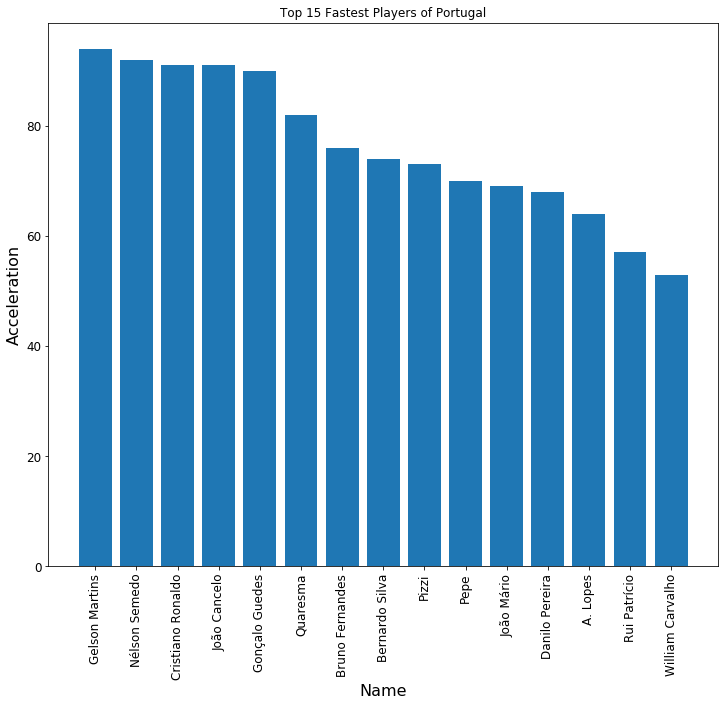

In [24]:
Country_data("Portugal")

In [25]:
x_variable = (['Name','Club'])

In [26]:
# x_variable(df)

In [27]:
y_variable = (['Value','Wage','International Reputation','Weak Foot','Acceleration','SprintSpeed','Positioning'])

In [28]:
def Country_name(df):
    return (df_nations)

In [29]:
def Country_data():
    x_axis = ipywidgets.Dropdown(options=(list(x_variable(df))))
    y_axis = ipywidgets.Dropdown(options=(list(y_variable(df))))
    data_country = ipywidgets.Dropdown(options=(list(df['Nationality'])))
#     temp_data = df[df.Nationality == data_country].head(15)
#     fig= plt.figure(figsize=(12,10))
#     plt.title("FIFA Data Analysis")
#     plt.bar(temp_data[x_axis],temp_data[y_axis])
#     plt.xlabel(x-axis,size=16)
#     plt.xticks(size=12,rotation=90)
#     plt.yticks(size=12)
#     plt.ylabel(y-axis,size=16)
#     plt.show()
    data_country
# ipywidgets.interact(Country_data)

In [30]:
X_value = ipywidgets.Dropdown(description= 'X-axis',value="Name",options= (list(x_variable)))

In [31]:
X_value

Dropdown(description='X-axis', options=('Name', 'Club'), value='Name')

Now we try to create widgets for interactivity with the graph. We first try to pull the data for x-axis variables.

In [32]:
Country_name = ipywidgets.Dropdown(description = 'Country name', value = 'Algeria', options=list(df['Nationality'].unique()))

In [33]:
Country_name

Dropdown(description='Country name', index=25, options=('Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium',…

In [34]:
Y_value = ipywidgets.Dropdown(description= 'Y-Axis',value="Value",options= list(y_variable))

In [35]:
Y_value

Dropdown(description='Y-Axis', options=('Value', 'Wage', 'International Reputation', 'Weak Foot', 'Acceleratio…

In [36]:
temp_data = df[df.Nationality == Country_name.value].head(15)

In [37]:
temp_data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
84,R. Mahrez,27,Algeria,85,85,None,405000000,205000,Left,3.0,4.0,5.0,Medium/ Medium,Lean,F,26.0,2023,5'10,148lbs,77+3,77+3,77+3,84+3,82+3,82+3,82+3,84+3,83+3,83+3,83+3,83+3,77+3,77+3,77+3,83+3,63+3,59+3,59+3,59+3,63+3,57+3,47+3,47+3,47+3,57+3,81.0,80.0,48.0,82.0,72.0,91.0,84.0,78.0,76.0,90.0,88.0,83.0,93.0,77.0,88.0,79.0,61.0,76.0,54.0,81.0,48.0,39.0,80.0,81.0,73.0,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0
94,Y. Brahimi,28,Algeria,85,85,None,39000000,28000,Right,3.0,3.0,4.0,High/ Medium,Normal,M,8.0,2019,5'9,146lbs,75+3,75+3,75+3,83+3,81+3,81+3,81+3,83+3,82+3,82+3,82+3,82+3,76+3,76+3,76+3,82+3,64+3,60+3,60+3,60+3,64+3,59+3,48+3,48+3,48+3,59+3,79.0,76.0,46.0,79.0,73.0,93.0,84.0,78.0,72.0,86.0,87.0,75.0,92.0,84.0,87.0,69.0,72.0,85.0,49.0,76.0,46.0,38.0,83.0,79.0,75.0,90.0,51.0,36.0,25.0,13.0,16.0,12.0,7.0,7.0
358,F. Ghoulam,27,Algeria,81,82,None,165000000,68000,Left,2.0,4.0,3.0,High/ Medium,Normal,D,31.0,2022,6'0,176lbs,70+2,70+2,70+2,74+2,73+2,73+2,73+2,74+2,73+2,73+2,73+2,76+2,76+2,76+2,76+2,76+2,80+2,77+2,77+2,77+2,80+2,79+2,76+2,76+2,76+2,79+2,85.0,54.0,70.0,79.0,52.0,79.0,77.0,68.0,74.0,80.0,71.0,82.0,72.0,79.0,62.0,80.0,73.0,88.0,68.0,69.0,74.0,76.0,69.0,69.0,76.0,75.0,79.0,81.0,80.0,12.0,7.0,8.0,8.0,13.0
507,R. Boudebouz,28,Algeria,80,80,None,15000000,31000,Left,2.0,4.0,4.0,High/ Medium,Lean,M,10.0,2021,5'10,163lbs,72+2,72+2,72+2,78+2,77+2,77+2,77+2,78+2,79+2,79+2,79+2,78+2,74+2,74+2,74+2,78+2,61+2,60+2,60+2,60+2,61+2,56+2,49+2,49+2,49+2,56+2,82.0,77.0,45.0,81.0,73.0,81.0,83.0,82.0,76.0,80.0,75.0,73.0,78.0,74.0,78.0,78.0,61.0,68.0,61.0,76.0,58.0,32.0,75.0,85.0,90.0,79.0,55.0,35.0,30.0,10.0,12.0,16.0,10.0,14.0
635,A. Mandi,26,Algeria,79,82,None,13000000,26000,Right,1.0,3.0,2.0,High/ Medium,Lean,D,23.0,2021,6'0,172lbs,63+2,63+2,63+2,66+2,65+2,65+2,65+2,66+2,67+2,67+2,67+2,68+2,71+2,71+2,71+2,68+2,75+2,76+2,76+2,76+2,75+2,76+2,78+2,78+2,78+2,76+2,78.0,41.0,84.0,78.0,36.0,64.0,67.0,49.0,73.0,73.0,65.0,66.0,77.0,76.0,65.0,52.0,82.0,69.0,74.0,49.0,69.0,80.0,67.0,68.0,35.0,74.0,78.0,79.0,84.0,15.0,16.0,9.0,10.0,14.0


In [38]:
# # trace = plt.bar(x=X_value.value,y=Y_value.value)
# # g = go.FigureWidget(data=[trace], layout = go.Layout(title=dict(text="FIFA 19 Analysis")))
# from ipywidgets import interactive,interact, HBox, Layout,VBox
# import plotly.express as px
# def plotting_fig(country_name,y):
    
#     temp_data = df[df.Nationality == Country_name.value].head(15)
#     temp_data = temp_data.sort_values(by=y,ascending=False)
#     temp_data = temp_data.head(15)
#     fig = px.bar(temp_data, x = "Name", y = y,
#                  hover_data=['Club','Jersey Number','Age','Position'],color = y,width = 800, height=600)
#     fig.show()
    
# #     fig= plt.figure(figsize=(12,10))
# #     plt.title("FIFA Data Analysis")
# #     plt.bar(temp_data['Name'],temp_data[y])
# #     plt.xlabel('Name',size=16)
# #     plt.xticks(size=12,rotation=90)
# #     plt.yticks(size=12)
# #     plt.ylabel(y,size=16)
# #     plt.show()

# container = ipywidgets.HBox([Country_name,Y_value])
# widget = interactive(plotting_fig, country_name=Country_name, y=Y_value)

# # # # ipywidgets.interact()
# # f=plotting_fig(Country_name,Y_value)

# # ipywidgets.VBox([container,widget])
# display(VBox([widget]))
# # #ipywidgets.VBox([f, container])

### The below visualization is a country-wise distribution, where we try to find out the top players within those attributes. For example, on x-axis, we have the name of the players and on y-axis, we have attributes like 'Value','Wage','International Reputation','Weak Foot','Acceleration','SprintSpeed','Positioning'. While hovering above each bar, we get information like the Club to which they play for and the position at which they play.

In [39]:
import plotly.express as px
from ipywidgets import interactive,interact, HBox, Layout,VBox

def plotting_fig_1(country_name,y_1):
    da = df[df.Nationality == country_name].head(15)
    da = da.sort_values(by=y_1,ascending=False)
    fig = px.bar(da, x='Name', y=y_1, title = "Top Players in "+country_name,
                 hover_data=['Club','Position'], color = y_1,height=800)
    fig.show()

widget_1 = interactive(plotting_fig_1, country_name=Country_name, y_1=Y_value)
display(VBox([widget_1]))
# f = plotting_fig_1(Country_name)

Next, we create a list of categories, where the personal attributes like 'Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys' etc. have been used to provide information about the top 15 best players with those attributes, for a particular country.

In [40]:
category = (['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle''GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'])
categories = ipywidgets.Dropdown(value="Crossing",options= list(category))

In [41]:
import plotly.express as px
def plot_field_stats(country_name,y2):
    da2 = df[df.Nationality == Country_name.value].head(15)
    da2 = da2.sort_values(by=y2,ascending=False)
    fig = px.bar(da2, x='Name', y=y2,
                 hover_data=['Club','Jersey Number','Position'], color='Positioning', width=800, height=700)
    fig.show()

widget_2 = interactive(plot_field_stats, country_name=Country_name, y2=categories)
display(VBox([widget_2]))